Emma Klemets, Oct 2022   
For looking at the processed data from fall 2022. As well as comparing the data taken around the MSR area in summer 2019 to this data.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
import sys, os
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter

sys.path.insert(1, '../PrettyPlotTools/')
import ParticlePlottingFunctions as ppf
import seaborn as sns

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
colNames = ['x', 'y', 'z','B_x', 'B_y', 'B_z']

file_22 = "data_export/map_referencedMSR_fall2022_together_interp50.txt"
data_22 = pd.read_csv(file_22, comment='#', sep='\t', names=colNames)

file_19 = "../MagMapping-export_TH_2019/data_export/map_referencedMSR_interp50.txt"
data_19 = pd.read_csv(file_19, comment='#', sep='\t', names=colNames)

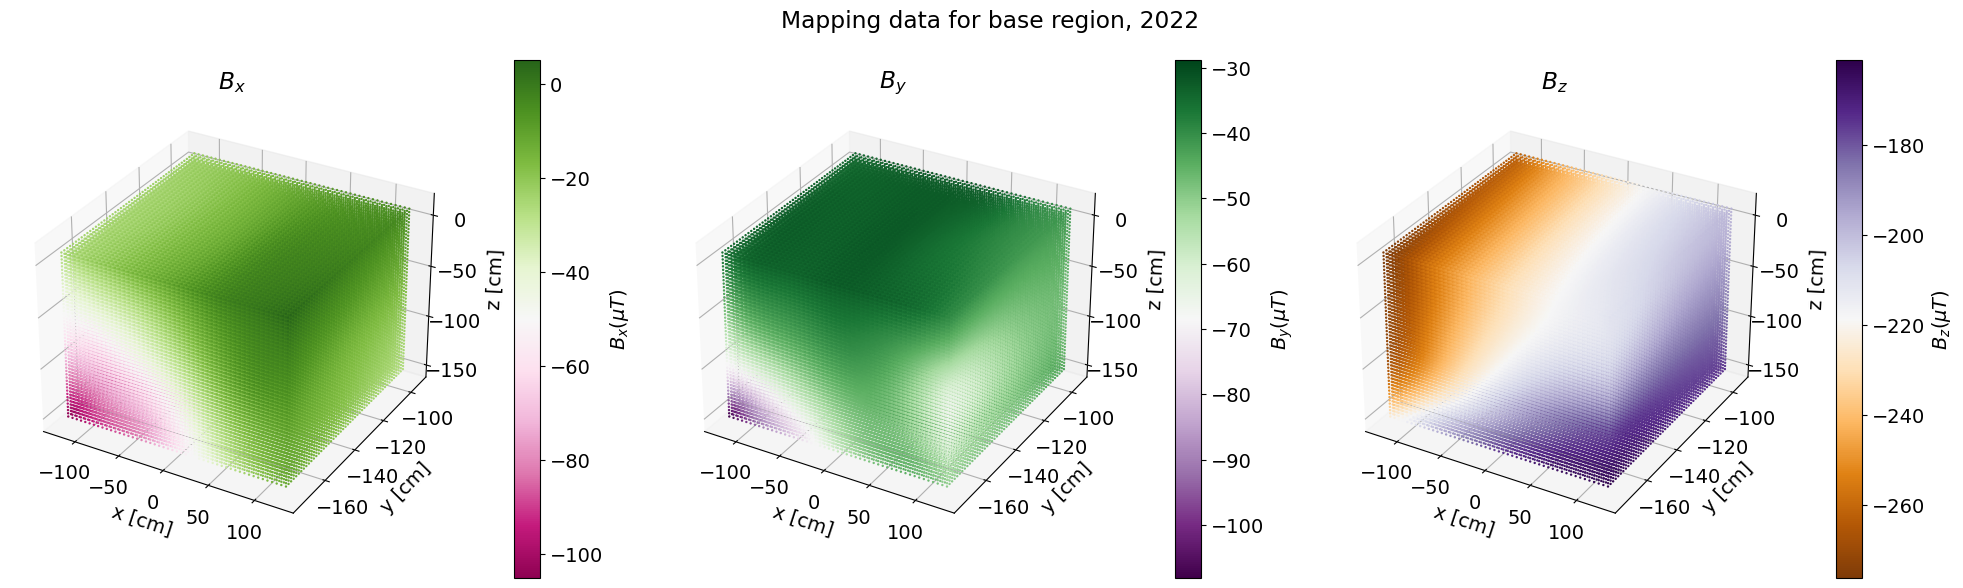

In [5]:
titleS = "Mapping data for base region, 2022"
plt.rcParams['font.size'] = '14'
N = None
ppf.PlotComponents(data_22, Compare=False, title=titleS, Sample=N)
plt.savefig(f'plots/base_3C.jpg', bbox_inches='tight')

# plt.savefig(f'plots/base_3C_{N}.pdf', bbox_inches='tight', dpi=10)
plt.show()

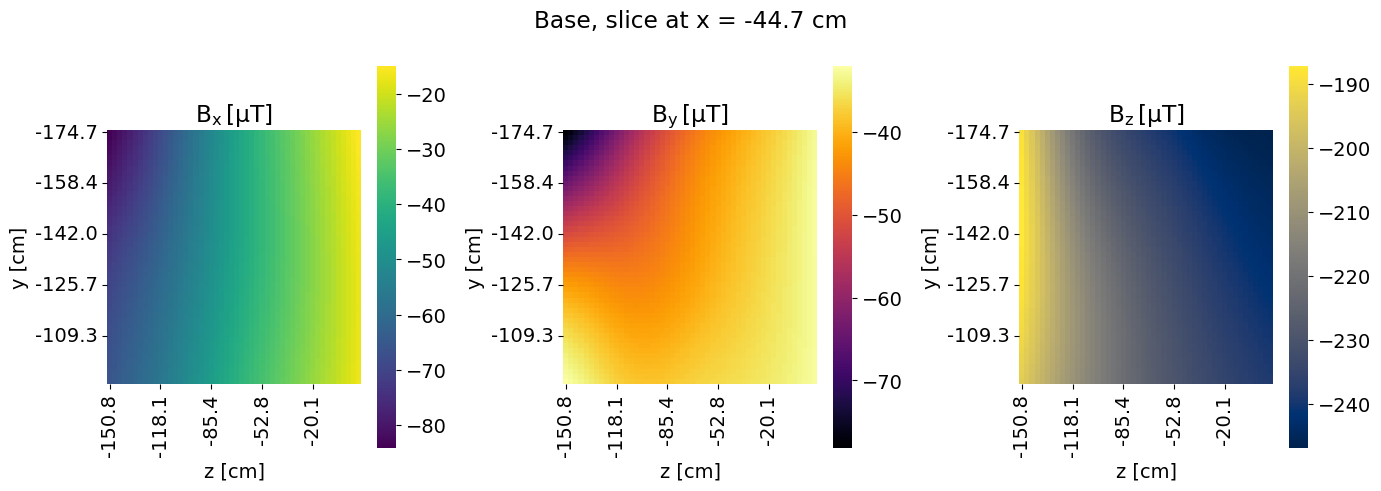

In [6]:
# print(data_22['x'].unique())
Xslice = data_22['x'].unique()[15]

# PlotComponentsSlice
ppf.PlotComponentsSliceHeat(data_22, slicer=[Xslice, None, None], 
                    Compare=False, fsize=(20,6), lims=None, title='Base')

plt.savefig(f'plots/base_2DSliceX_{Xslice}.pdf', bbox_inches='tight')
plt.show()

In [ ]:
# print(data_22['z'].unique())
Zslice = data_22['z'].unique()[-1]

# PlotComponentsSlice
ppf.PlotComponentsSliceHeat(data_22, slicer=[None, None, Zslice], 
                    Compare=False, fsize=(20,6), lims=None, title='Base')

plt.savefig(f'plots/base_2DSliceZ_{Zslice}.pdf', bbox_inches='tight')
plt.show()

In [ ]:
# PlotComponentsSlice
ppf.PlotComponentsSlice(data_22, slicer=[Xslice, None, None], 
                    Compare=False, fsize=(20,6), lims=None, title=None)

plt.savefig(f'plots/base_3CSlice_{Xslice}.pdf', bbox_inches='tight')
plt.show()

In [ ]:
%matplotlib inline 
#widget
fig = plt.figure() #figsize=(11, 5)
axes = mplot3d.Axes3D(fig)

Q_19 = axes.scatter(data_19['x'], data_19['y'], data_19['z'], s=.5, alpha=.1, label="2019")
Q_22 = axes.scatter(data_22['x'], data_22['y'], data_22['z'], s=1, alpha=1, label="2022" )

axes.set_xlabel('x [cm]')
axes.set_ylabel('y [cm]')
axes.set_zlabel('z [cm]')
axes.legend()
plt.show()

In [ ]:
%matplotlib inline

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

B1_19 = np.sqrt(data_19['B_x']**2 + data_19['B_y']**2 + data_19['B_z']**2 )*100 #muT
Q_19 = ax1.scatter(data_19['x'], data_19['y'], data_19['z'],c=B1_19, s=.5, alpha=1, cmap=cm.plasma)

cbar_19 = fig.colorbar(Q_19, label='2019 data, $|B|\,(\mu T)$', ax=ax1, pad=0.1)

B1_22 = np.sqrt(data_22['B_x']**2 + data_22['B_y']**2 + data_22['B_z']**2 ) #muT
Q_22 = ax2.scatter(data_22['x'], data_22['y'], data_22['z'],c=B1_22, s=1, alpha=1, cmap=cm.viridis)

cbar_22 = fig.colorbar(Q_22, label='2022 data, $|B|\,(\mu T)$', ax=ax2, pad=0.1)

ax1.set_xlabel('x [cm]')
ax1.set_ylabel('y [cm]')
ax1.set_zlabel('z [cm]')
ax2.set_xlabel('x [cm]')
ax2.set_ylabel('y [cm]')
ax2.set_zlabel('z [cm]')
plt.show()

# Cut files for matching

In [7]:
cut_22 = "data_export/map_referencedMSR_fall2022_together_CUT_interp50.txt"
dataCut_22 = pd.read_csv(cut_22, comment='#', sep='\t', names=colNames)

#the data in this file for the B field is 
cut_19 = "../MagMapping-export_TH_2019/data_export/map_referencedMSR_interp_CUT_interp50.txt"
dataCut_19 = pd.read_csv(cut_19, comment='#', sep='\t', names=colNames)

print("2019 limits:")
mins_19 = np.min(dataCut_19)
max_19 = np.max(dataCut_19)
print(mins_19,'\n', max_19)

print("2022 limits:")
mins_22 = np.min(dataCut_22)
max_22 = np.max(dataCut_22)

print(mins_22, '\n',max_22)


2019 limits:
x      -90.100000
y     -174.711330
z     -150.751650
B_x   -103.579643
B_y    -79.578744
B_z   -256.526638
dtype: float64 
 x      123.609390
y      -94.612790
z        9.257800
B_x     -5.617606
B_y    -32.184553
B_z   -156.833015
dtype: float64
2022 limits:
x      -90.100000
y     -174.711330
z     -150.751650
B_x    -94.285496
B_y    -94.418055
B_z   -263.919420
dtype: float64 
 x      123.609390
y      -94.612790
z        9.257800
B_x      5.140000
B_y    -28.791676
B_z   -160.995889
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


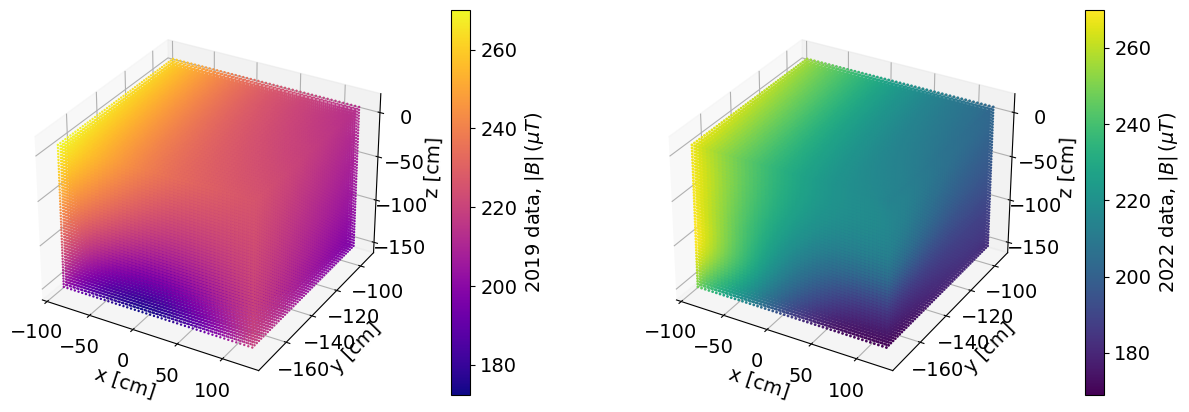

In [8]:
%matplotlib inline

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

B1_19 = np.sqrt(dataCut_19['B_x']**2 + dataCut_19['B_y']**2 + dataCut_19['B_z']**2 )#muT
Q_19 = ax1.scatter(dataCut_19['x'], dataCut_19['y'], dataCut_19['z'],c=B1_19, s=.5, alpha=1, cmap=cm.plasma)

cbar_19 = fig.colorbar(Q_19, label='2019 data, $|B|\,(\mu T)$', ax=ax1, pad=0.1)

B1_22 = np.sqrt(dataCut_22['B_x']**2 + dataCut_22['B_y']**2 + dataCut_22['B_z']**2 ) #muT
Q_22 = ax2.scatter(dataCut_22['x'], dataCut_22['y'], dataCut_22['z'],c=B1_22, s=1, alpha=1, cmap=cm.viridis)

cbar_22 = fig.colorbar(Q_22, label='2022 data, $|B|\,(\mu T)$', ax=ax2, pad=0.1)

ax1.set_xlabel('x [cm]')
ax1.set_ylabel('y [cm]')
ax1.set_zlabel('z [cm]')
ax2.set_xlabel('x [cm]')
ax2.set_ylabel('y [cm]')
ax2.set_zlabel('z [cm]')
plt.show()

In [9]:
# list(dataCut_19.columns)

df_compare = dataCut_19.join(dataCut_22, rsuffix='_22', how='outer')
#                               on=list(dataCut_22.columns))

# df_compare.loc[0]['x_19'] = 0
# display(df_compare.columns)
df_compare = df_compare.where((df_compare['x']==df_compare['x_22']) & 
                                      (df_compare['y']==df_compare['y_22']) &
                                      (df_compare['z']==df_compare['z_22']))
df_compare = df_compare.drop(columns=['x_22', 'y_22', 'z_22'])
# display(df_compare)

df_compare['dB_x'] = df_compare['B_x'] - df_compare['B_x_22'] 
df_compare['dB_y'] = df_compare['B_y'] - df_compare['B_y_22'] 
df_compare['dB_z'] = df_compare['B_z'] - df_compare['B_z_22'] 

# display(df_compare)

C:\Users\Emma\AppData\Local\Temp\ipykernel_34360\4280305485.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes = mplot3d.Axes3D(fig)


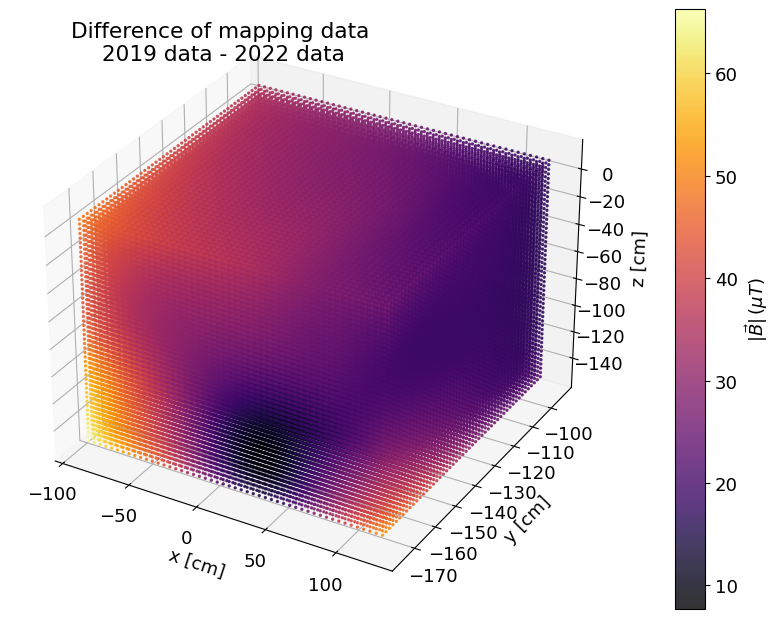

mean 24.454766174402355
std 7.465581494819152


In [10]:
%matplotlib inline

plt.rcParams['font.size'] = '13'

fig = plt.figure(figsize=(13, 6))
axes = mplot3d.Axes3D(fig)
fig.suptitle("Difference of mapping data\n 2019 data - 2022 data")

B1_diff = np.sqrt(df_compare['dB_x']**2 + df_compare['dB_y']**2 + df_compare['dB_z']**2 ) #muT
Q_22 = axes.scatter(df_compare['x'], df_compare['y'], df_compare['z'],c=B1_diff, s=2, alpha=.8, cmap=cm.inferno)

cbar_22 = fig.colorbar(Q_22, label='$|\\vec{B}|\,(\mu T)$', pad=0.05)

# plt.subplots_adjust(wspace=4.0)
axes.set_xlabel('x [cm]')
axes.set_ylabel('y [cm]', labelpad=7)
axes.set_zlabel('z [cm]', labelpad=7)
plt.show()
print("mean", np.mean(B1_diff))
print("std", np.std(B1_diff))

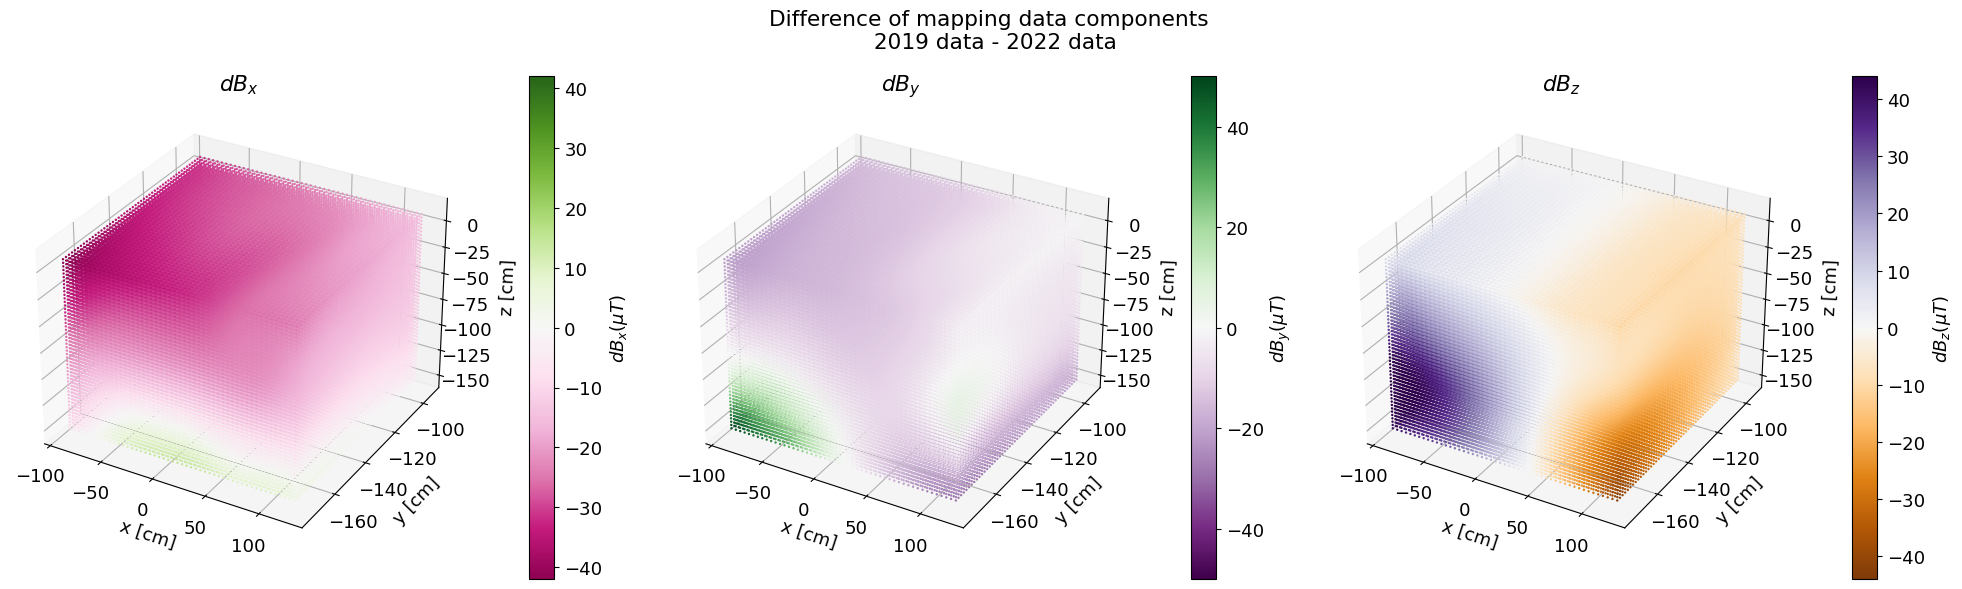

In [11]:
limsA = np.array([[-42, 42], [-50, 50], [-44, 44]])
titleS = "Difference of mapping data components \n 2019 data - 2022 data"

ppf.PlotComponents(df_compare, Compare=True, lims=limsA, title=titleS, Sample=None)
plt.savefig('plots/compare_3C.png', bbox_inches='tight')
plt.show()

In [12]:
print("mean (x,y,z): ", np.mean(df_compare['dB_x']), np.mean(df_compare['dB_y']), 
      np.mean(df_compare['dB_z']))
print("STD (x,y,z): ", np.std(df_compare['dB_x']), np.std(df_compare['dB_y']), 
      np.std(df_compare['dB_z']))

mean (x,y,z):  -16.79683725262247 -6.654554952087327 5.52693342547019
STD (x,y,z):  8.56961242513111 7.211486929980489 13.09056371785573


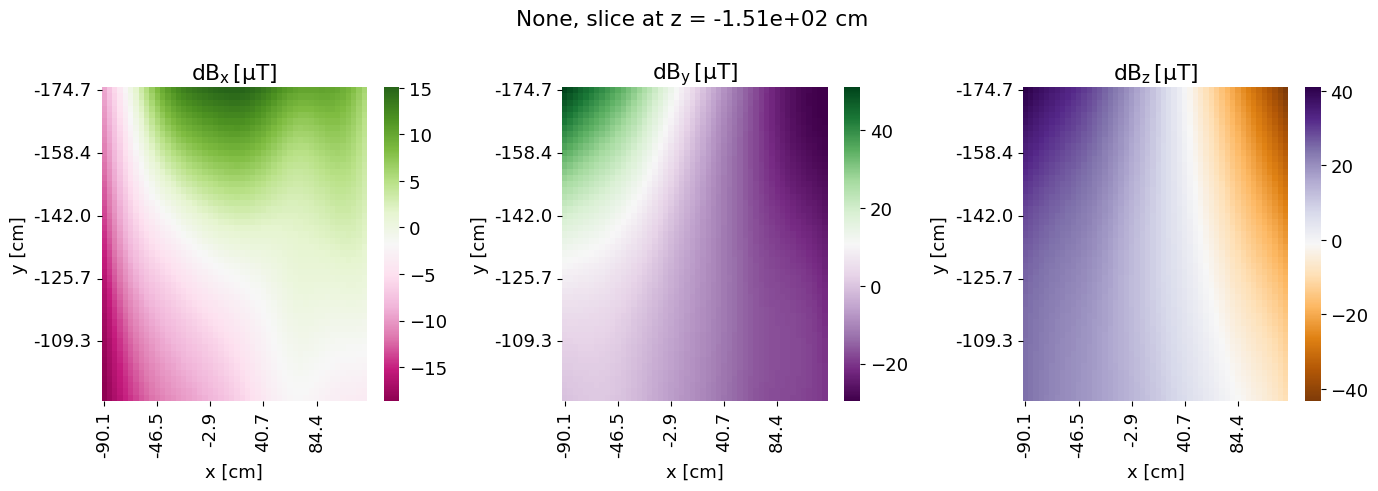

In [13]:
Xslice = df_compare['x'][0]
Zslice = df_compare['z'][0]
limsA = np.array([[-42, 42], [-50, 50], [-50, 50]])
ppf.PlotComponentsSliceHeat(df_compare, slicer=[None, None, Zslice], 
                    Compare=True, fsize=(20,6), lims=None, title=None)

plt.savefig(f'plots/compare_2CSlice_{Xslice}.pdf', bbox_inches='tight')
plt.show()

C:\Users\Emma\Documents\uni\TUCAN\MesonMagMapping\Fall_2022\../PrettyPlotTools\ParticlePlottingFunctions.py:341: UserWarning: FixedFormatter should only be used together with FixedLocator
  axi.set_xticklabels(axi.get_xticks(),  rotation=50,
C:\Users\Emma\Documents\uni\TUCAN\MesonMagMapping\Fall_2022\../PrettyPlotTools\ParticlePlottingFunctions.py:345: UserWarning: FixedFormatter should only be used together with FixedLocator
  axi.set_yticklabels(axi.get_yticks(),  rotation=-25,
C:\Users\Emma\Documents\uni\TUCAN\MesonMagMapping\Fall_2022\../PrettyPlotTools\ParticlePlottingFunctions.py:446: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  ax3.set_title('$\mathsf{B_z}$')


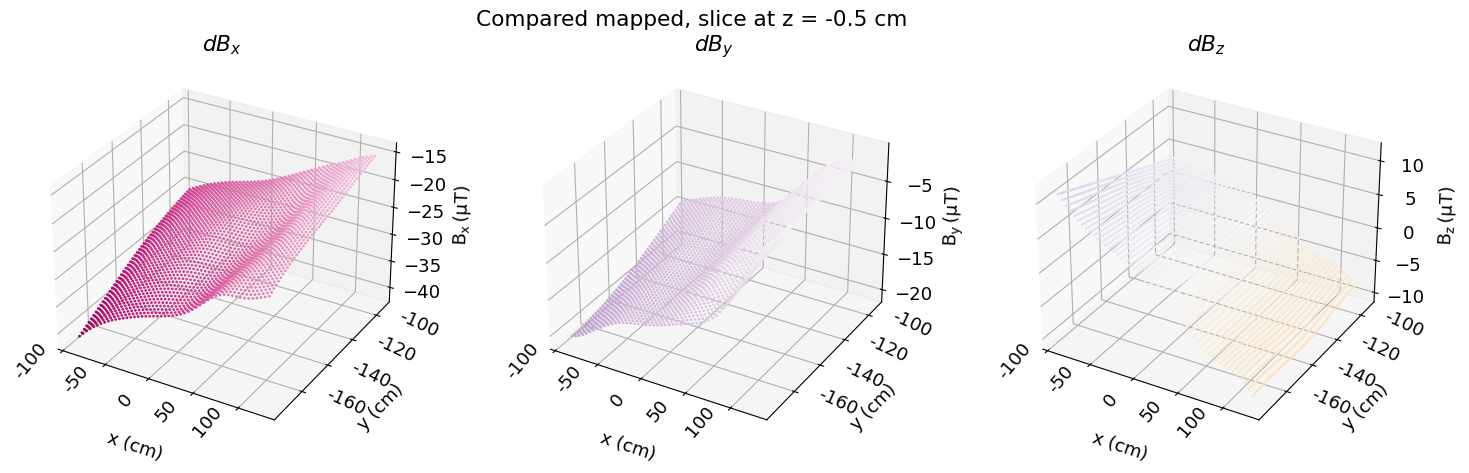

In [115]:
Xslice = df_compare['x'][0]
ppf.PlotComponentsSlice(df_compare, slicer=[None, None, 0], 
                    Compare=True, fsize=(18,5), lims=limsA, title='Compared mapped')

# plt.savefig(f'plots/compare_3CSlice_{Xslice}.svg', bbox_inches='tight')
plt.show()

## Stairs data

In [30]:
colNames = ['x', 'y', 'z','B_x', 'B_y', 'B_z']

file_22_s = "data_export/map_referencedMSR_fall2022_stairs_interp50.txt"
data_22_s = pd.read_csv(file_22_s, comment='#', sep='\t', names=colNames)

In [31]:
# print("2022 limits:")
mins_22 = np.min(data_22_s)
max_22 = np.max(data_22_s)

# print("mins:", minsAll)
# print("max:", maxsAll)

print(  f"x_min, x_max = {mins_22['x']}, {max_22['x']} \n" +
        f"y_min, y_max = {mins_22['y']}, {max_22['y']} \n"+
        f"z_min, z_max = {mins_22['z']}, {max_22['z']}")

x_min, x_max = -136.91688, -56.91688 
y_min, y_max = -310.16409, -300.16409 
z_min, z_max = -71.89625999999998, 8.103740000000016


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


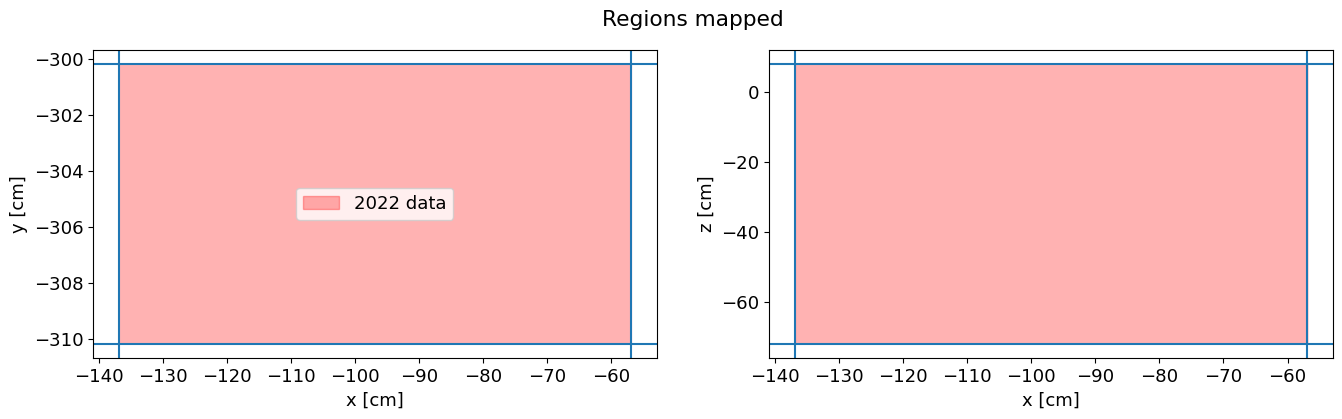

In [32]:
%matplotlib inline

x_min, x_max = -136.91688, -56.91688 
y_min, y_max = -310.16409, -300.16409 
z_min, z_max = -71.89625999999998, 8.103740000000016

fig, axs = plt.subplots(1, 2, figsize=(16,4))
plt.suptitle("Regions mapped")

minY_22 = np.min(mins_22['y'])
maxY_22 = np.max(max_22['y'])

axs[0].fill_between(data_22_s['x'], minY_22, maxY_22, color='r',alpha=.3, label='2022 data')

axs[0].axvline(x_min)
axs[0].axvline(x_max)
axs[0].axhline(y_min)
axs[0].axhline(y_max)

axs[0].set_xlabel('x [cm]')
axs[0].set_ylabel('y [cm]')
axs[0].legend()

minZ_22 = np.min(mins_22['z'])
maxZ_22 = np.max(max_22['z'])

axs[1].fill_between(data_22_s['x'], minZ_22, maxZ_22, color='r',alpha=.3)

axs[1].axvline(x_min)
axs[1].axvline(x_max)
axs[1].axhline(z_min)
axs[1].axhline(z_max)

axs[1].set_xlabel('x [cm]')
axs[1].set_ylabel('z [cm]')

plt.show()

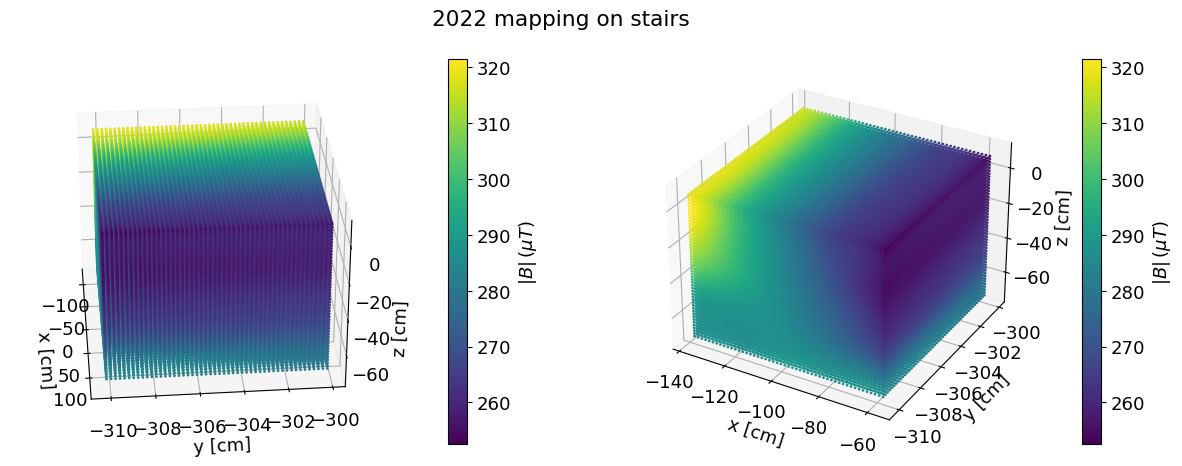

In [33]:
%matplotlib inline

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
fig.suptitle("2022 mapping on stairs")

B1_22 = np.sqrt(data_22_s['B_x']**2 + data_22_s['B_y']**2 + data_22_s['B_z']**2 ) #muT
Q_22 = ax1.scatter(data_22['x'], data_22_s['y'], data_22_s['z'],c=B1_22, s=1, alpha=1, cmap=cm.viridis)
ax1.view_init(elev=30., azim=-5)

cbar_22 = fig.colorbar(Q_22, label='$|B|\,(\mu T)$', ax=ax1, pad=0.1)

Q_22 = ax2.scatter(data_22_s['x'], data_22_s['y'], data_22_s['z'],c=B1_22, s=1, alpha=1, cmap=cm.viridis)

cbar_22 = fig.colorbar(Q_22, label='$|B|\,(\mu T)$', ax=ax2, pad=0.1)

ax1.set_xlabel('x [cm]')
ax1.set_ylabel('y [cm]')
ax1.set_zlabel('z [cm]')
ax2.set_xlabel('x [cm]')
ax2.set_ylabel('y [cm]')
ax2.set_zlabel('z [cm]')
plt.show()

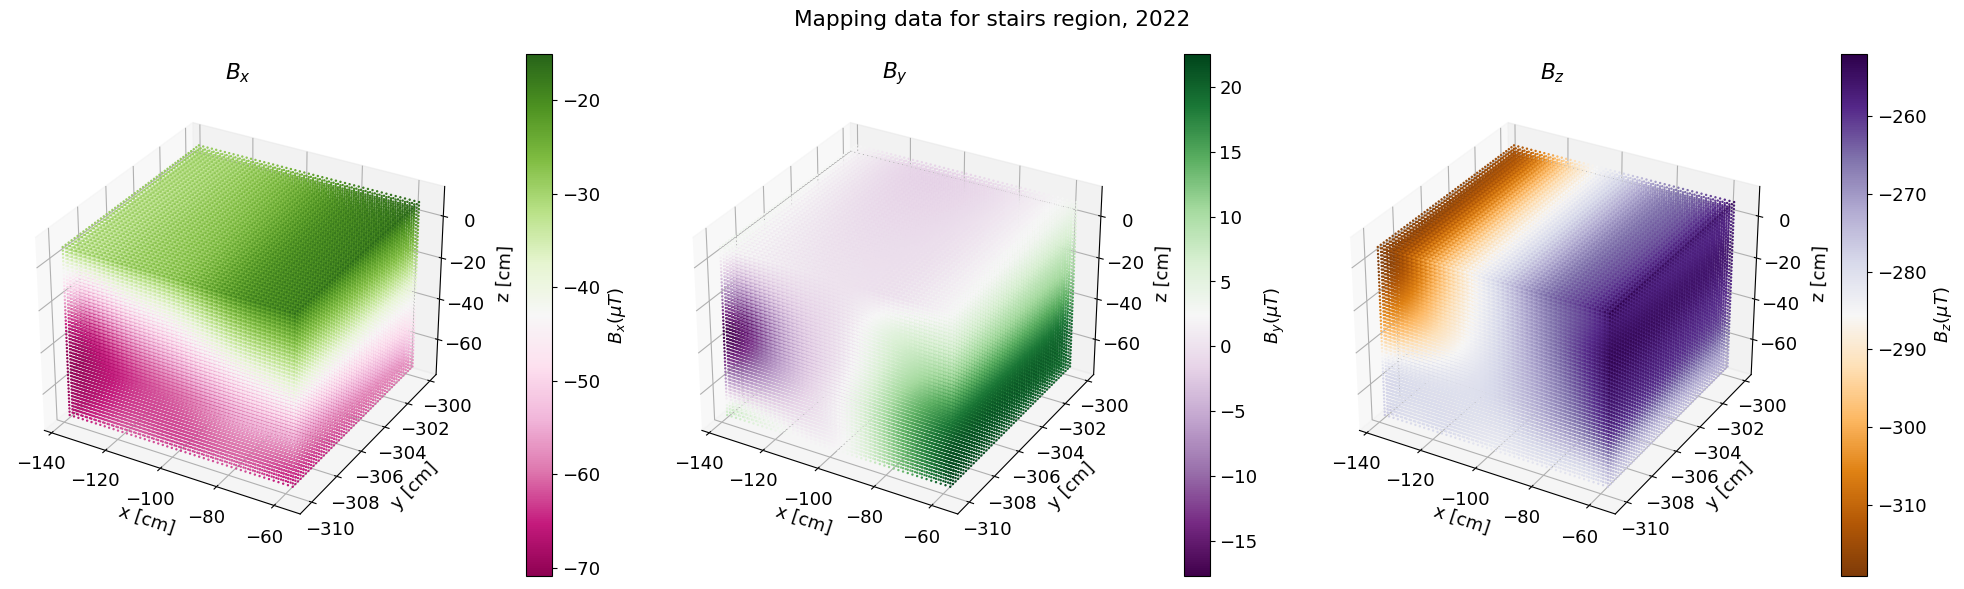

In [34]:
titleS = "Mapping data for stairs region, 2022"

ppf.PlotComponents(data_22_s, Compare=False, title=titleS)
plt.savefig('plots/stairs_3C.png', bbox_inches='tight')
plt.show()

C:\Users\Emma\Documents\uni\TUCAN\MesonMagMapping\Fall_2022\../PrettyPlotTools\ParticlePlottingFunctions.py:341: UserWarning: FixedFormatter should only be used together with FixedLocator
  axi.set_xticklabels(axi.get_xticks(),  rotation=50,
C:\Users\Emma\Documents\uni\TUCAN\MesonMagMapping\Fall_2022\../PrettyPlotTools\ParticlePlottingFunctions.py:345: UserWarning: FixedFormatter should only be used together with FixedLocator
  axi.set_yticklabels(axi.get_yticks(),  rotation=-25,
C:\Users\Emma\Documents\uni\TUCAN\MesonMagMapping\Fall_2022\../PrettyPlotTools\ParticlePlottingFunctions.py:449: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout(pad=3,rect=[0, 0, 1, 0.99])# plt.colorbar(sc, ax=ax4)


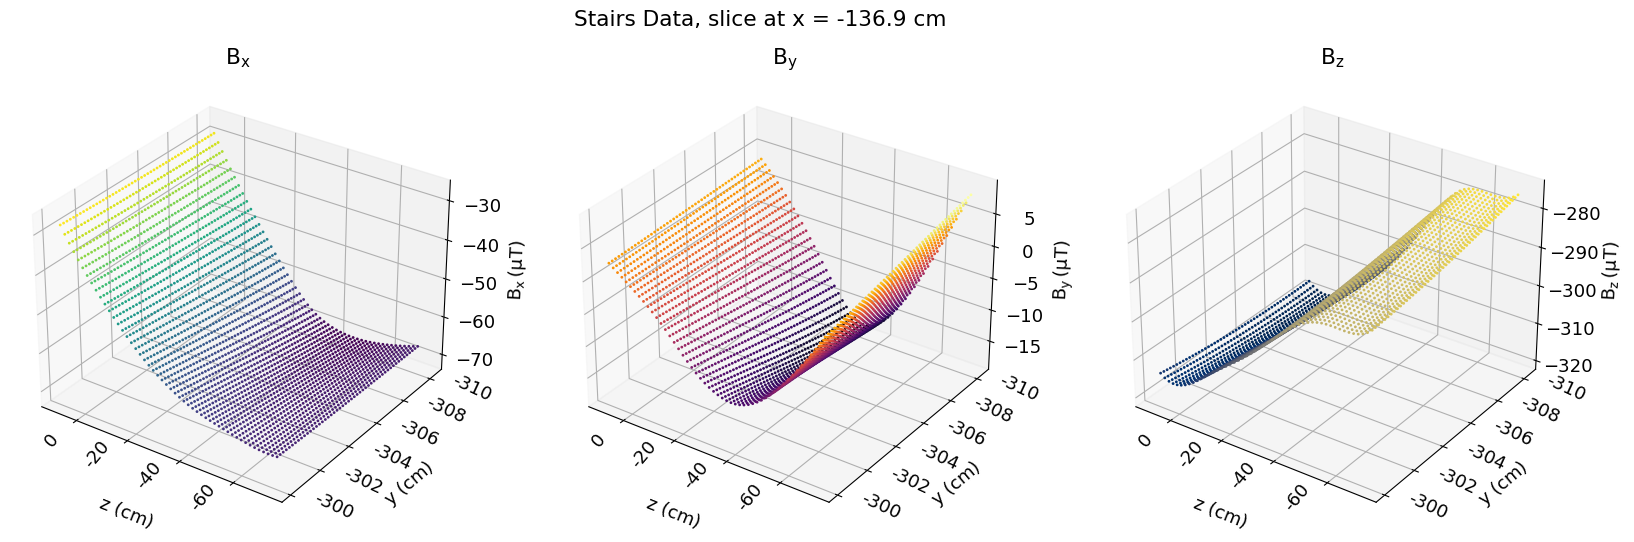

In [102]:
Xslice = -137 #data_22_s['x'][0]
ppf.PlotComponentsSlice(data_22_s, slicer=[Xslice, None, None], 
                    Compare=False, fsize=(20,6), lims=None, title='Stairs Data')

plt.savefig(f'plots/stairs_3CSlice_{Xslice}.pdf', bbox_inches='tight')
plt.show()

C:\Users\Emma\Documents\uni\TUCAN\MesonMagMapping\Fall_2022\../PrettyPlotTools\ParticlePlottingFunctions.py:341: UserWarning: FixedFormatter should only be used together with FixedLocator
  axi.set_xticklabels(axi.get_xticks(),  rotation=50,
C:\Users\Emma\Documents\uni\TUCAN\MesonMagMapping\Fall_2022\../PrettyPlotTools\ParticlePlottingFunctions.py:345: UserWarning: FixedFormatter should only be used together with FixedLocator
  axi.set_yticklabels(axi.get_yticks(),  rotation=-25,


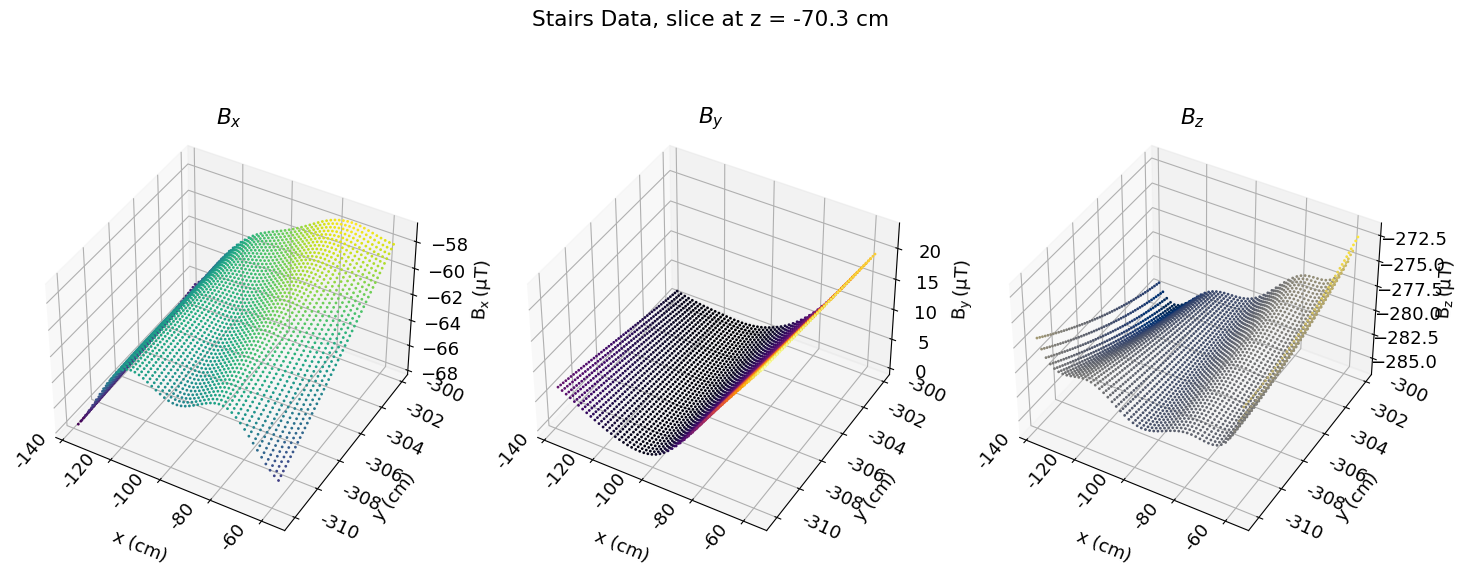

In [121]:
# print(data_22_s['z'].unique())
# Zslice = data_22_s['z'][124995]
Zslice = -70.
# print(data_22_s['z'])
ppf.PlotComponentsSlice(data_22_s, slicer=[None, None, Zslice], Compare=False, 
                        fsize=(15,6), lims=None, title='Stairs Data')

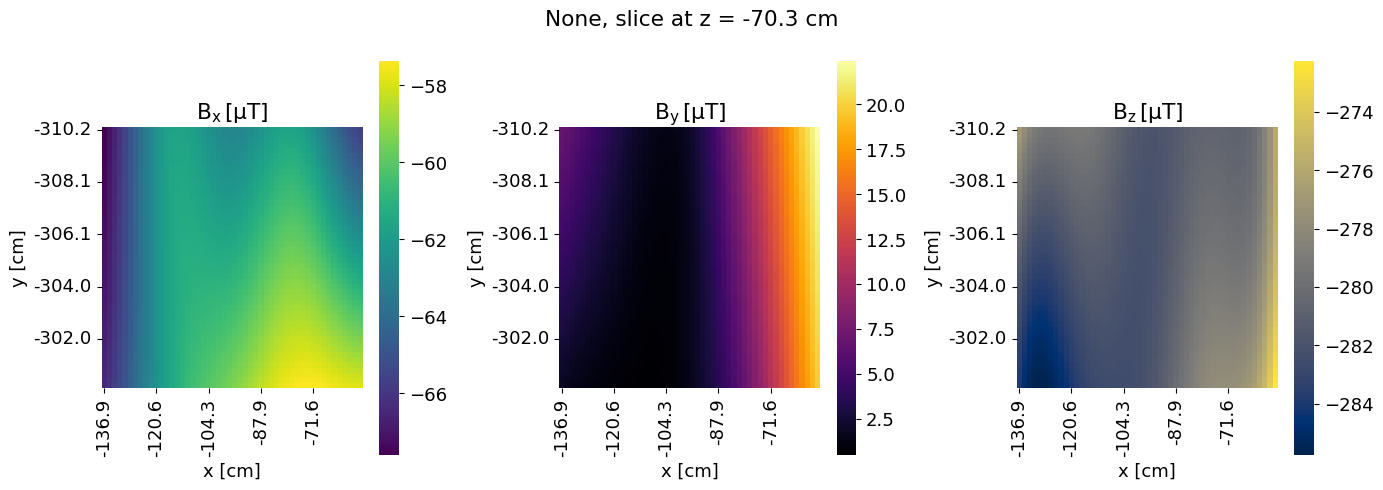

In [92]:
ppf.PlotComponentsSliceHeat(data_22_s, slicer=[None, None, Zslice], 
                    Compare=False, fsize=(20,6), lims=None, title=None)

plt.savefig(f'plots/stairs_2CSlice_{Zslice}.pdf', bbox_inches='tight')
plt.show()

## Making lots of sliced plots

In [ ]:
def MakeSlices(df, title, tag, compare=False):
    plt.rcParams['font.size'] = '14'
    
    n = 10
    #X slices
    Xslices = df['x'].unique()[::n]  
    for S in Xslices:
        ppf.PlotComponentsSliceHeat(df, slicer=[S, None, None], 
                            Compare=compare, fsize=(20,6), lims=None, title=title)
        plt.savefig(f'SlicedPlots/{tag}_2DSliceX_{S}.png', bbox_inches='tight')
        
        ppf.PlotComponentsSlice(df, slicer=[S, None, None], 
                    Compare=compare, fsize=(20,6), lims=None, title=title)
        plt.savefig(f'SlicedPlots/{tag}_3CSliceX_{S}.png', bbox_inches='tight')
    #Y slices
    Yslices = df['y'].unique()[::n]  
    for S in Yslices:
        ppf.PlotComponentsSliceHeat(df, slicer=[None, S, None], 
                            Compare=compare, fsize=(20,6), lims=None, title=title)
        plt.savefig(f'SlicedPlots/{tag}_2DSliceY_{S}.png', bbox_inches='tight')
        
        ppf.PlotComponentsSlice(df, slicer=[None, S, None], 
                    Compare=compare, fsize=(20,6), lims=None, title=title)
        plt.savefig(f'SlicedPlots/{tag}_3CSliceY_{S}.png', bbox_inches='tight')
    
    #Z slices
    Zslices = df['z'].unique()[::n]  
    for S in Zslices:
        ppf.PlotComponentsSliceHeat(df, slicer=[None, None, S], 
                            Compare=compare, fsize=(20,6), lims=None, title=title)
        plt.savefig(f'SlicedPlots/{tag}_2DSliceZ_{S}.png', bbox_inches='tight')
        
        ppf.PlotComponentsSlice(df, slicer=[None, None, S], 
                    Compare=compare, fsize=(20,6), lims=None, title=title)
        plt.savefig(f'SlicedPlots/{tag}_3CSliceZ_{S}.png', bbox_inches='tight')

In [ ]:
MakeSlices(data_22, "Base Data", 'base', compare=False)
MakeSlices(df_compare, "Comparison Data", 'Comp', compare=False)
MakeSlices(data_22_s, "Stairs Data", 'stair', compare=False)
plt.show()